In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shaaguunzz","key":"76ff8d7f3bfe2be940673a02748b71a5"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d prajitdatta/movielens-100k-dataset

movielens-100k-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip movielens-100k-dataset.zip

Archive:  movielens-100k-dataset.zip
replace ml-100k/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-100k/README          
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [ ]:
#lets import necessary modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
overall_stats=pd.read_csv("ml-100k/u.info", header=None)
print("Detauls of users, items and ratings included in the datasets ",list[overall_stats[0]])

Detauls of users, items and ratings included in the datasets  list[0         943 users
1        1682 items
2    100000 ratings
Name: 0, dtype: object]


ok so there are total 100000 ratings done by 943 users  on total 1682 items

In [ ]:
column_names1=["user_id","movie_id","rating","timestamp"]
dataset=pd.read_csv('ml-100k/u.data',sep="\t", header=None, names=column_names1)
dataset.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
print(len(dataset),max(dataset['movie_id']),min(dataset['movie_id']))

100000 1682 1


In [ ]:
#lets explore items now

info= 'movie_id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = info.split(' | ')
column_names2


['movie_id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [ ]:
items_dataset=pd.read_csv("ml-100k/u.item",sep="|", header=None, names =column_names2,encoding='latin-1')
items_dataset.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
movie_dataset=items_dataset[["movie_id","movie title"]]
movie_dataset.head()

,movie_id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
#since both of them have movie_id lets merge the dataste
merged_dataset=pd.merge(dataset,movie_dataset, how='inner', on='movie_id') # inner join
merged_dataset.head()

,user_id,movie_id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
merged_dataset.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


Number of movies: 1682
Number of users: 943


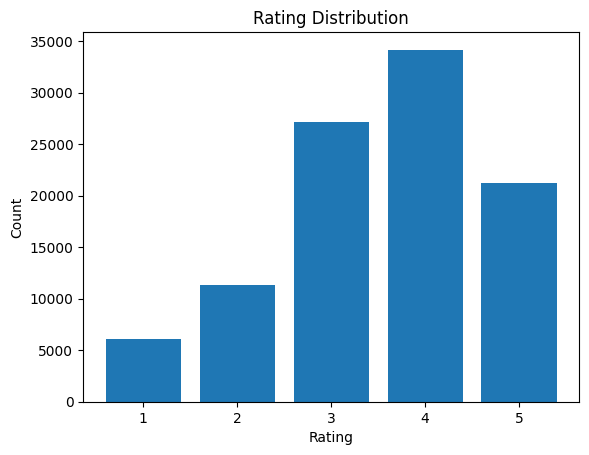

In [ ]:
#lets check number of unique movies and users
# Check the number of unique movies and users
num_movies = merged_dataset['movie_id'].nunique()
num_users = merged_dataset['user_id'].nunique()
print("Number of movies:", num_movies)
print("Number of users:", num_users)

# Check the distribution of ratings
rating_counts = merged_dataset['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


here we can see most of the movies has been rated 4 stars followed by 3 stars

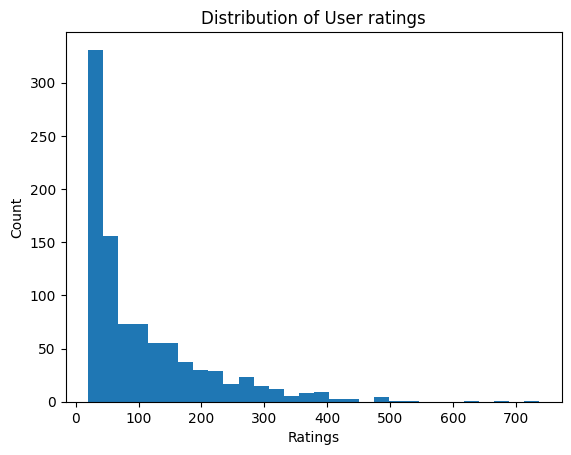

In [ ]:
#lets see the number of ratings per user
user_ratings_counts=merged_dataset['user_id'].value_counts()

#plot the distribution
plt.hist(user_ratings_counts,bins=30)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of User ratings")
plt.show()

In [ ]:
#lets see the highest rated movies
avg_highly_rated_movies=merged_dataset.groupby(['movie title']).agg({'rating':'mean'})['rating'].sort_values(ascending=False)
avg_highly_rated_movies=avg_highly_rated_movies.to_frame()
avg_highly_rated_movies.head(10)

,rating
movie title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
"Great Day in Harlem, A (1994)",5.0
Aiqing wansui (1994),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0


these are the top 10 most rated movies


In [ ]:
#lets check the number of movies with different range of rating

print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with above 4 star and below 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with above 3 star and below 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with above 2 star and below 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with above 1 star and below 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))


Number of movies with 5 star rating on average:  10
Number of movies with above 4 star and below 5 star rating on average:  163
Number of movies with above 3 star and below 4 star rating on average:  871
Number of movies with above 2 star and below 3 star rating on average:  492
Number of movies with above 1 star and below 2 star rating on average:  128
Number of movies with below 1 star rating on average:  0


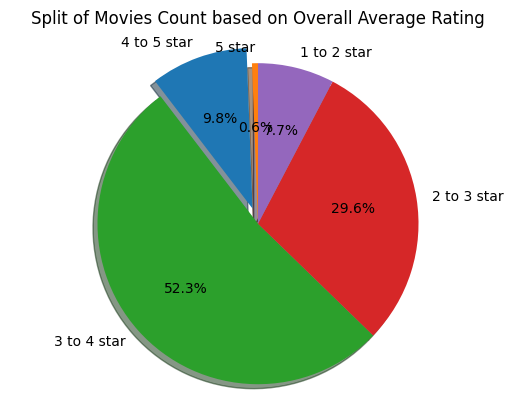

In [ ]:
#lets create a pirchart to see split of movies count based on their avg rating
# Split of movies count based on their overall average rating
labels = ['5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star']
sizes = [10, 163, 871, 492, 128]
colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']
explode = (0, 0.1, 0, 0, 0)  # Explode the 2nd slice (i.e., '4 to 5 star')

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Split of Movies Count based on Overall Average Rating')
plt.show()


In [ ]:
#lets create a list of top 10 highest average rated movies
avg_highly_rated_movies.reset_index(level=0,inplace=True)
avg_highly_rated_movies.columns=['movie title','avg_rating']
avg_highly_rated_movies.head(10)

,movie title,avg_rating
0,They Made Me a Criminal (1939),5.0
1,Marlene Dietrich: Shadow and Light (1996),5.0
2,"Saint of Fort Washington, The (1993)",5.0
3,Someone Else's America (1995),5.0
4,Star Kid (1997),5.0
5,"Great Day in Harlem, A (1994)",5.0
6,Aiqing wansui (1994),5.0
7,Santa with Muscles (1996),5.0
8,Prefontaine (1997),5.0
9,Entertaining Angels: The Dorothy Day Story (1996),5.0


they have highest top average rating so we can naively suggest this to the user

In [ ]:
#lets see the movies with different ranges of viewers
popular_movies=merged_dataset.groupby(['movie title']).agg({'rating':'count'})['rating'].sort_values(ascending=False)

In [ ]:
popular_movies=popular_movies.to_frame()
popular_movies.reset_index(inplace=True,level=0)
popular_movies.columns=["movie title","Number of users watched"]

In [ ]:

print("Number of popular movies with more than 500 viewers: ",len(popular_movies[popular_movies['Number of users watched'] >= 500]))
print("Number of popular movies with more than 400 and less than 500 viewers: ",len(popular_movies[(popular_movies['Number of users watched'] >= 400) & (popular_movies['Number of users watched'] < 500)]))
print("Number of popular movies with more than 300 and less than 400 viewers: ",len(popular_movies[(popular_movies['Number of users watched'] >= 300) & (popular_movies['Number of users watched'] < 400)]))
print("Number of popular movies with more than 200 and less than 300 viewers: ",len(popular_movies[(popular_movies['Number of users watched'] >= 200) & (popular_movies['Number of users watched'] < 300)]))
print("Number of popular movies with more than 100 and less than 200 viewers: ",len(popular_movies[(popular_movies['Number of users watched'] >= 100) & (popular_movies['Number of users watched'] < 200)]))
print("Number of popular movies with less than 100 viewers: ", len(popular_movies[(popular_movies['Number of users watched'] < 100)]))


Number of popular movies with more than 500 viewers:  4
Number of popular movies with more than 400 and less than 500 viewers:  8
Number of popular movies with more than 300 and less than 400 viewers:  22
Number of popular movies with more than 200 and less than 300 viewers:  84
Number of popular movies with more than 100 and less than 200 viewers:  220
Number of popular movies with less than 100 viewers:  1326


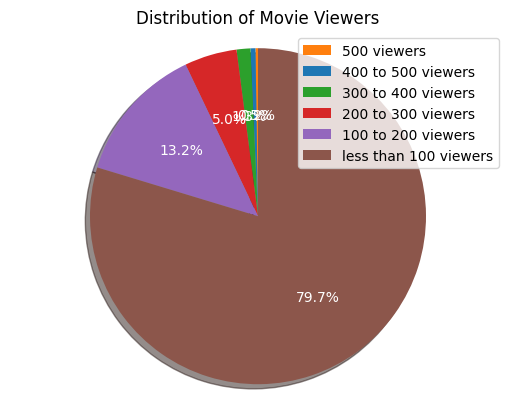

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
viewers = [4, 8, 22, 84, 220, 1326]
labels = ['500 viewers', '400 to 500 viewers', '300 to 400 viewers', '200 to 300 viewers', '100 to 200 viewers', 'less than 100 viewers']
colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create the pie chart
fig, ax = plt.subplots()
_, _, autotexts = ax.pie(viewers, labels=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create the legend
ax.legend(labels, loc='upper right')

# Set the text properties of the autotexts
for autotext in autotexts:
    autotext.set_color('white')  # Set text color to white

# Add a title
plt.title('Distribution of Movie Viewers')

# Display the pie chart and legend
plt.show()


In [ ]:
#more than 400 views is considered popular so lets see the names
popular_movies[popular_movies['Number of users watched']>=400]

,movie title,Number of users watched
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


we can recommend these movies based on popularity

In [ ]:
#lets move on to genre now
movie_genre_list=column_names2[-19:]
movie_genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

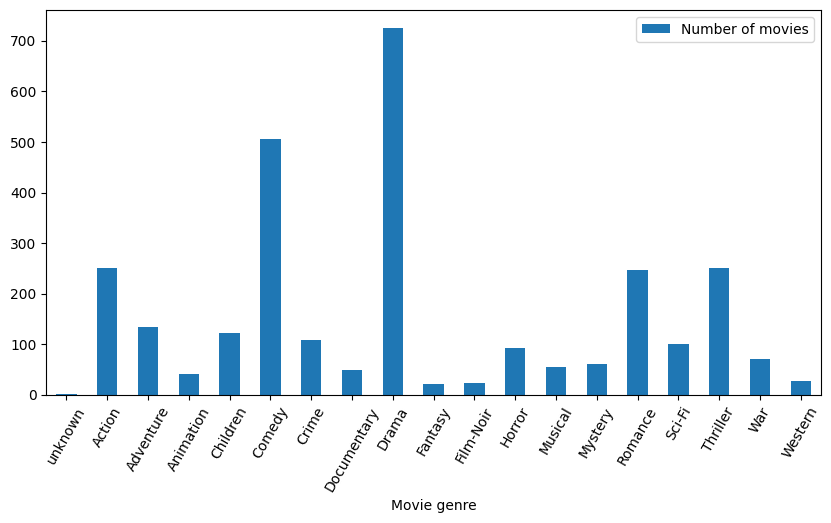

In [ ]:
#lets see count of movies in each genre
count=[]
for i in movie_genre_list:
  genre_based_movies=items_dataset[['movie_id', "movie title",i]]
  genre_based_movies=genre_based_movies[genre_based_movies[i]==1]
  count.append(len(genre_based_movies))

df=pd.DataFrame({'Movie genre':movie_genre_list, "Number of movies":count})
ax=df.plot.bar(x="Movie genre", y='Number of movies', rot=60,figsize=(10,5))

so the most common genres are drama , comedy and romance and thriller. We can aslo naively recommend them based on the genre



##we have seen lot of which we can recommend movies based on ratings, average views and genres now lets use associative rules learning


In [ ]:
items_dataset.columns

Index(['movie_id', 'movie title', 'release date', 'video release date',
       'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
genres_dataset=items_dataset.drop(['movie title', 'release date', 'video release date',
       'IMDb URL'], axis=1)

In [ ]:
genres_dataset

,movie_id,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#lets combine this with the merged datase based on movie_id
final_df=pd.merge(merged_dataset,genres_dataset,how='inner', on='movie_id')

In [ ]:
final_df['movie_id']

0         242
1         242
2         242
3         242
4         242
         ... 
99995    1674
99996    1640
99997    1637
99998    1630
99999    1641
Name: movie_id, Length: 100000, dtype: int64

Lets make the data for arl

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics.pairwise import cosine_similarity

# Define genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Prepare the data for association rule mining
cols = ['user_id', 'movie_id', 'rating'] + genre_columns
subset_data = final_df[cols]

# Calculate the number of users who have watched each movie
num_users_watched = subset_data.groupby('movie_id')['user_id'].count()

# Set the minimum number of users watched threshold
min_users_watched = 100

# Filter movies based on the number of users watched
filtered_data = subset_data[subset_data['movie_id'].isin(num_users_watched[num_users_watched >= min_users_watched].index)]

# Convert the ratings into binary format
filtered_data['rating_binary'] = np.where(filtered_data['rating'] >= 4, 1, 0)

# Pivot the data to obtain binary format
binary_data = filtered_data.pivot(index='user_id', columns='movie_id', values='rating_binary').fillna(0)

# Perform association rule mining
frequent_itemsets = apriori(binary_data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Sort the rules by confidence
rules = rules.sort_values(by='confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-52-d070af189be8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['rating_binary'] = np.where(filtered_data['rating'] >= 4, 1, 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a

In [ ]:
final_df.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_id', 'movie_id', 'rating', 'timestamp', 'movie title', 'unknown',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
# Function to get top n recommendations for a user
def get_top_n_recommendations(user_id, n):
    # Filter movies that the user has not watched
    user_movies = binary_data.loc[user_id]
    user_unwatched_movies = user_movies[user_movies == 0].index

    # Get the association rules relevant to the user's watched movies
    user_rules = rules[rules['antecedents'].apply(lambda x: any(item in x for item in user_movies.index))]

    # Sort the rules by lift and confidence
    user_rules = user_rules.sort_values(by=['lift', 'confidence'], ascending=False)

    # Get the recommended movies
    recommendations = []
    for _, rule in user_rules.iterrows():
        recommended_movies = list(rule['consequents'])
        recommendations.extend(recommended_movies)

        if len(recommendations) > n:
            break

    # Filter the recommendations to include only unwatched movies
    filtered_recommendations = [movie for movie in recommendations if movie in user_unwatched_movies]

    # Display the recommendations
    print(f"Top {n} Recommended Movies for User {user_id}:")
    for i, movie in enumerate(filtered_recommendations[:n]):
        print(f"{i+1}. Movie name: {final_df[final_df['movie_id']==movie]['movie title'][:1].to_list()}")
        print



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Example usage
user_id = 84

get_top_n_recommendations(user_id,5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 5 Recommended Movies for User 84:
1. Movie name: ['Star Wars (1977)']
2. Movie name: ['Terminator, The (1984)']
3. Movie name: ['Return of the Jedi (1983)']
4. Movie name: ['Terminator 2: Judgment Day (1991)']
5. Movie name: ['Empire Strikes Back, The (1980)']
